__Question 1.__ What percentage of the observations in the dataset are instances of fraud?

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("fraud_data.csv")
    
fraud = len(df[df['Class'] == 1])
    
    
print(fraud/len(df['Class']))

0.016410823768035772


__Question 2.__ Split data into training and test set. Train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score
    
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
dummy_majority = DummyClassifier(strategy= 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
    
accuracy = accuracy_score(y_test, y_dummy_predictions)
recall = recall_score(y_test, y_dummy_predictions)
    
print('Accuracy =',accuracy)
print('Recall =' ,recall)

Accuracy = 0.9852507374631269
Recall = 0.0


__Question 3.__ Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score

svm = SVC().fit(X_train, y_train)
svm_predict = svm.predict(X_test)
    
accuracy = accuracy_score(y_test, svm_predict)
precision = precision_score(y_test, svm_predict)
recall = recall_score(y_test, svm_predict)
    
print('Accuracy =',accuracy)
print('Recall =' ,recall)
print('Precision =' ,precision)

Accuracy = 0.9900442477876106
Recall = 0.35
Precision = 0.9333333333333333


__Question 4.__ Using the SVC classifier with parameters {'C': 1e9, 'gamma': 1e-07}, what is the confusion matrix when using a threshold of -220 on the decision function.

In [8]:
from sklearn.metrics import confusion_matrix

svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
svm_predict = svm.decision_function(X_test)
    
y_pred = (svm_predict >= -220).astype(int)
    
print(confusion_matrix(y_test, y_pred))

[[5319   25]
 [  13   67]]


__Question 5.__ Train a logisitic regression classifier with default parameters using X_train and y_train. This classifier should use the parameter solver='liblinear'.

For the logisitic regression classifier, compute the scores using decision_function() or with predict_proba(), then create a precision recall curve.

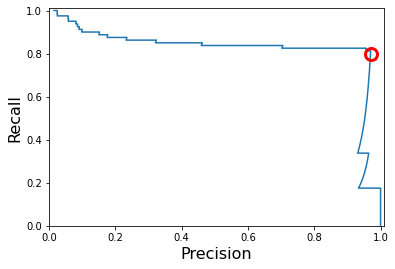

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


lr = LogisticRegression(solver='liblinear')
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

plt.show()

Looking at the precision recall curve, what is the recall when the precision is 0.75?

In [10]:
target_precision = 0.75

idx = (np.abs(precision - target_precision)).argmin()
corresponding_recall = recall[idx]
print(corresponding_recall)

0.825


__Question 6.__ Create a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

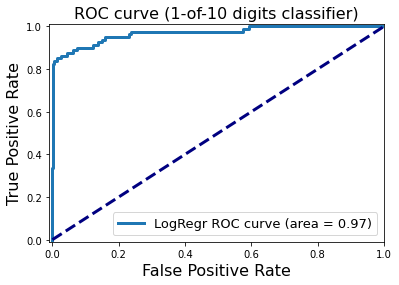

In [13]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.show()

__Question 7.__ Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use solver='liblinear', more explanation here)

'penalty': ['l1', 'l2']

'C':[0.01, 0.1, 1, 10]

From .cv_results_, create an array of the mean test scores of each parameter combination

In [14]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='liblinear')
    
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}
    
grid_clf_rec = GridSearchCV(lr, param_grid = grid_values, scoring ='recall', cv = 5)
grid_clf_rec.fit(X_train, y_train)

mean_test_scores = np.array(grid_clf_rec.cv_results_['mean_test_score'])
    
scores = mean_test_scores.reshape(4,2)
    
print(scores)

[[0.69558442 0.77168831]
 [0.80792208 0.81155844]
 [0.80428571 0.81149351]
 [0.80064935 0.80064935]]


Visualize results from the grid search

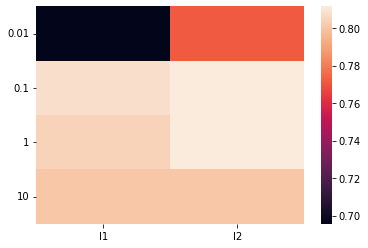

In [15]:
import seaborn as sns
plt.figure()
sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
plt.yticks(rotation=0);